In [1]:
import requests
from PIL import Image
import io
import random
import numpy as np

API_KEY = "Put your API Key here"

In [2]:
def get_data(lat = 47.3769, long = 8.5417, zoom=18, res = (500,500)):
    url_base = "https://maps.googleapis.com/maps/api/staticmap?"
    center = "center="+str(lat)+","+str(long)
    zoom_level = "&zoom="+str(zoom)
    img_res= "&size="+str(res[0])+"x"+str(res[1])
    api_key=f"&key={API_KEY}"
    # Remove labels for satellite images
    sat_map_style = "&style=feature:all|element:labels|visibility:off"
    # Remove labels and extract just road for road segementation mask, setting road color to white
    road_map_style= "&style=feature:all|element:labels|visibility:off" + "&style=feature:all|element:geometry|visibility:off"\
    + "&style=feature:road|visibility:on" + "&style=feature:road|color:0xffffff" + \
    "&style=feature:road|element:labels|visibility:off" 
    req_url_sat_img = url_base+center+zoom_level+img_res + "&maptype=satellite" + sat_map_style + api_key
    req_url_road_img = url_base+center+zoom_level+img_res + road_map_style + api_key
    icon = requests.get(req_url_sat_img).content
    sat_image = Image.open(io.BytesIO(icon))
    # Put black background behind the Road Image mask (since GMAP gives white for roads and transparent otherwise)
    road_image = Image.open(io.BytesIO(requests.get(req_url_road_img).content)).convert('RGBA')
    background = Image.new('RGBA', road_image.size, (0, 0, 0))
    road_image = Image.alpha_composite(background, road_image)
    return sat_image,road_image

In [3]:
#Coordinate range for cities
chicago = {'W': -88.311501, 'N':41.643560 ,  'E': -87.682533, 'S':42.072123 }
# Detroit: -83.630676,42.043174,-82.834167,42.839724
detroit = {'W':-83.630676,'N':42.043174,'E':-82.834167,'S':42.839724}
# Los Angeles: -118.668823,33.615763,-117.095032,34.285588
la = {'W':-118.668823,'N':33.615763,'E':-117.095032,'S':34.285588}
# Zurich: 8.421364,47.318112,8.648643,47.431803
zurich = {'W': 8.421364, 'N': 47.318112, 'E': 8.648643, 'S': 47.431803}
# Bern: 7.297325,46.926117,7.508125,46.996646
bern = {'W':7.297325,'N':46.926117,'E':7.508125,'S':46.996646}
# Paris: 2.190399,48.763431,2.517929,48.935131 
paris = {'W':2.190399,'N':48.763431,'E':2.517929,'S':48.935131}
# Montreal: -74.193420,45.276819,-73.300781,45.757942
montreal = {'W':-74.193420,'N':45.276819,'E':-73.300781,'S':45.757942}

cities = [chicago,detroit,la,zurich,bern,paris,montreal]

41.984334,-88.075839
41.882778,-87.832770
41.950511,-87.879489
41.928630,-88.262914
42.059687,-87.980104
41.960297,-88.173338
41.771513,-88.221526
41.757251,-87.735311
41.993911,-87.789872
41.961838,-87.928417


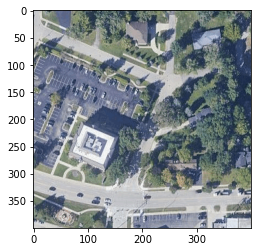

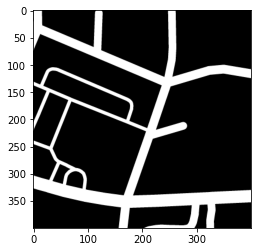

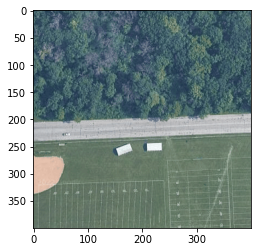

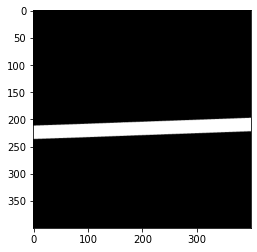

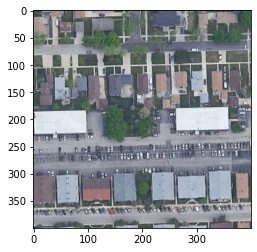

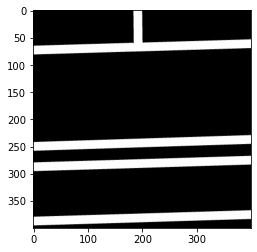

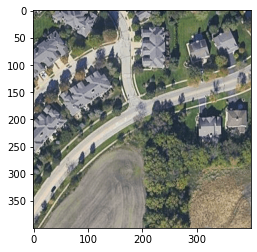

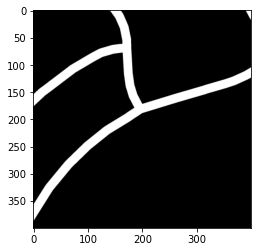

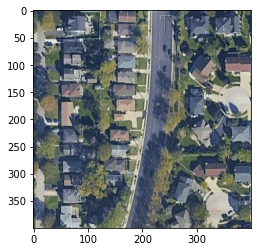

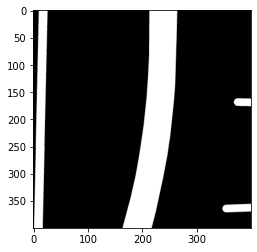

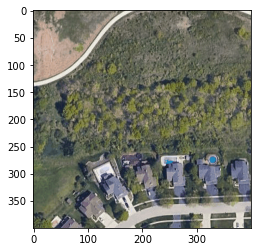

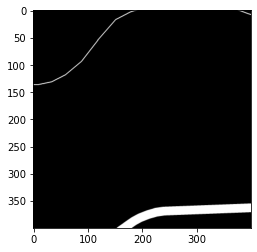

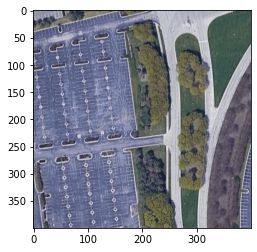

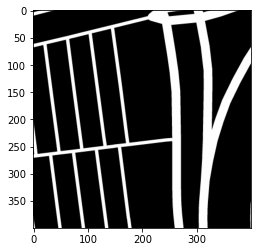

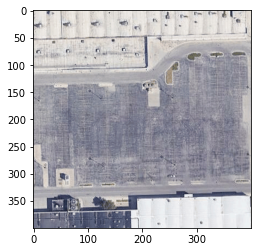

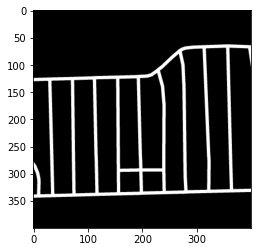

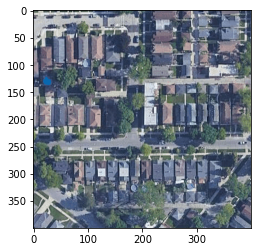

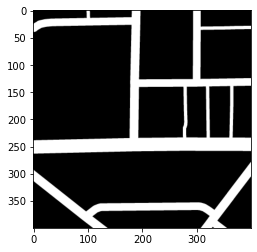

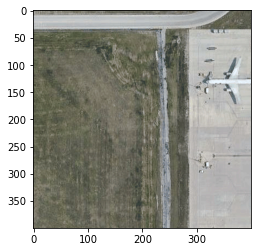

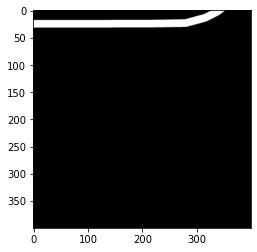

In [21]:
import matplotlib.pyplot as plt

for i in range(10):
    long = "{:.6f}".format(random.uniform(chicago['W'], chicago['E']))
    lat = "{:.6f}".format(random.uniform(chicago['N'], chicago['S']))
    print(lat,long,sep=',')
    sat_image, road_image = get_data(lat, long,zoom=18)
    plt.figure()
    plt.imshow(np.array(sat_image.convert('RGBA'))[50:450,50:450,:])
    plt.figure()
    plt.imshow(np.array(road_image.convert('RGBA'))[50:450,50:450:])

In [ ]:
# Setting seed
random.seed(42)

# Path where to store images and groundtruth
sat_image_path = "./gmap_data/images/"
road_image_path = "./gmap_data/groundtruth/"
i = 0
j = 0
# When to change city
cchange = {400: 1, 800: 2, 1200:3, 1600:4, 2000:5, 2400:6}
while i<2800:
    long = "{:.6f}".format(random.uniform(cities[j]['W'], cities[j]['E']))
    lat = "{:.6f}".format(random.uniform(cities[j]['N'], cities[j]['S']))
    sat_image, road_image = get_data(lat, long)
    sat_image_crop = np.array(sat_image.convert('RGBA'))[50:450,50:450,:]
    road_image_crop = np.array(road_image.convert('RGBA'))[50:450,50:450,:]
    sat_image_f = Image.fromarray(sat_image_crop)
    road_image_f = Image.fromarray(road_image_crop)
    # Ensure that there is some road (5%) in the mask at minimum
    if road_image_crop[:,:,0].sum()/255/400/400*100 >= 5:
        sat_image_f.save(sat_image_path+f"satimage_{i}.png")
        road_image_f.save(road_image_path+f"satimage_{i}.png")
        i+=1
    # Change cities after 400 images:
    if i in cchange:
        j = cchange[i]